In [2]:
# Load the packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
# Load the the benin dataset
df = pd.read_csv("../data/benin-malanville.csv")

Understanding the Dataset

In [75]:
# Check the shape of the dataset
df.shape

(525600, 19)

In [10]:
# Print all the columns of the dataset
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [11]:
# Summary statistics for each column in the dataset
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [12]:
# Check for null values
df.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [13]:
# Check for duplicate entries
df.duplicated().sum()

0

Data Preprocessing

In [76]:
# Remove the Comments column as it is an empty column
df = df.drop(columns=['Comments'])

In [77]:
# Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [16]:
df['Timestamp']

0        2021-08-09 00:01:00
1        2021-08-09 00:02:00
2        2021-08-09 00:03:00
3        2021-08-09 00:04:00
4        2021-08-09 00:05:00
                 ...        
525595   2022-08-08 23:56:00
525596   2022-08-08 23:57:00
525597   2022-08-08 23:58:00
525598   2022-08-08 23:59:00
525599   2022-08-09 00:00:00
Name: Timestamp, Length: 525600, dtype: datetime64[ns]

In [78]:
df.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3
5,2021-08-09 00:06:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.8,0.0,0.4,0.1,119.1,0.0,997,0,0.0,26.4,26.3
6,2021-08-09 00:07:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.0,0.0,0.0,0.0,0.0,997,0,0.0,26.5,26.3
7,2021-08-09 00:08:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.7,1.3,0.6,126.8,2.8,997,0,0.0,26.5,26.3
8,2021-08-09 00:09:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.4,1.1,0.5,124.9,5.5,997,0,0.0,26.5,26.4
9,2021-08-09 00:10:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.5,1.1,0.5,114.2,5.1,997,0,0.0,26.5,26.4


In [79]:
# Check for negative values in GHI, DNI, DHI
negative_values = df[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]

In [80]:
# Count the negative values in each column
negative_counts = negative_values[['GHI', 'DNI', 'DHI']].apply(lambda x: (x < 0).sum())

In [81]:
negative_counts

GHI    258847
DNI    275987
DHI    259182
dtype: int64

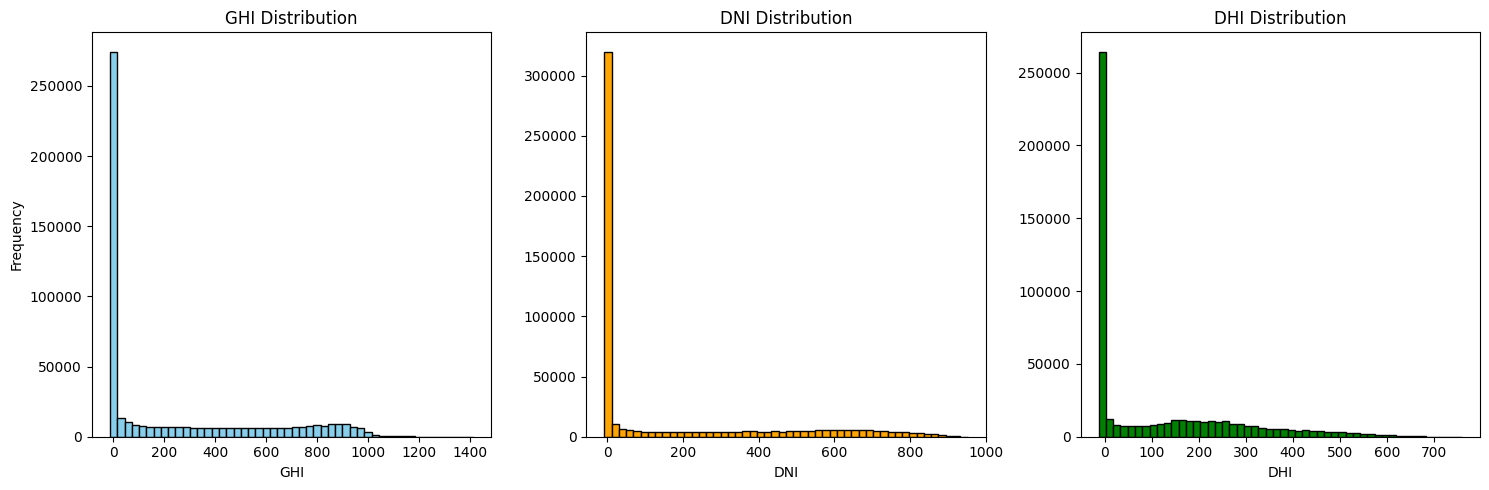

In [47]:
# Plot the distribution of GHI, DNI, DHI to inspect the data
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['GHI'], bins=50, color='skyblue', edgecolor='black')
plt.title('GHI Distribution')
plt.xlabel('GHI')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['DNI'], bins=50, color='orange', edgecolor='black')
plt.title('DNI Distribution')
plt.xlabel('DNI')

plt.subplot(1, 3, 3)
plt.hist(df['DHI'], bins=50, color='green', edgecolor='black')
plt.title('DHI Distribution')
plt.xlabel('DHI')

plt.tight_layout()
plt.show()


In [48]:
# Inspect the times when negative values occur
negative_times = negative_values['Timestamp']
negative_counts, negative_times.head()

(GHI    258847
 DNI    275987
 DHI    259182
 dtype: int64,
 0   2021-08-09 00:01:00
 1   2021-08-09 00:02:00
 2   2021-08-09 00:03:00
 3   2021-08-09 00:04:00
 4   2021-08-09 00:05:00
 Name: Timestamp, dtype: datetime64[ns])

In [85]:
# Calculate the median of positive values only
ghi_median_pos = df.loc[df['GHI'] >= 0, 'GHI'].median()
dni_median_pos = df.loc[df['DNI'] >= 0, 'DNI'].median()
dhi_median_pos = df.loc[df['DHI'] >= 0, 'DHI'].median()


In [84]:
# Output the positive medians for verification
print(f"GHI Median: {ghi_median_pos}, DNI Median: {dni_median_pos}, DHI Median: {dhi_median_pos}")

GHI Median: 474.2, DNI Median: 345.7, DHI Median: 213.4


In [86]:
# Replace negative values with the median of the respective column
df['GHI'] = df['GHI'].apply(lambda x: ghi_median_pos if x < 0 else x)
df['DNI'] = df['DNI'].apply(lambda x: dni_median_pos if x < 0 else x)
df['DHI'] = df['DHI'].apply(lambda x: dhi_median_pos if x < 0 else x)

In [87]:

# Optional: Print to confirm changes
print(df[['GHI', 'DNI', 'DHI']].head())

     GHI    DNI    DHI
0  474.2  345.7  213.4
1  474.2  345.7  213.4
2  474.2  345.7  213.4
3  474.2  345.7  213.4
4  474.2  345.7  213.4


Explanatory Analysis

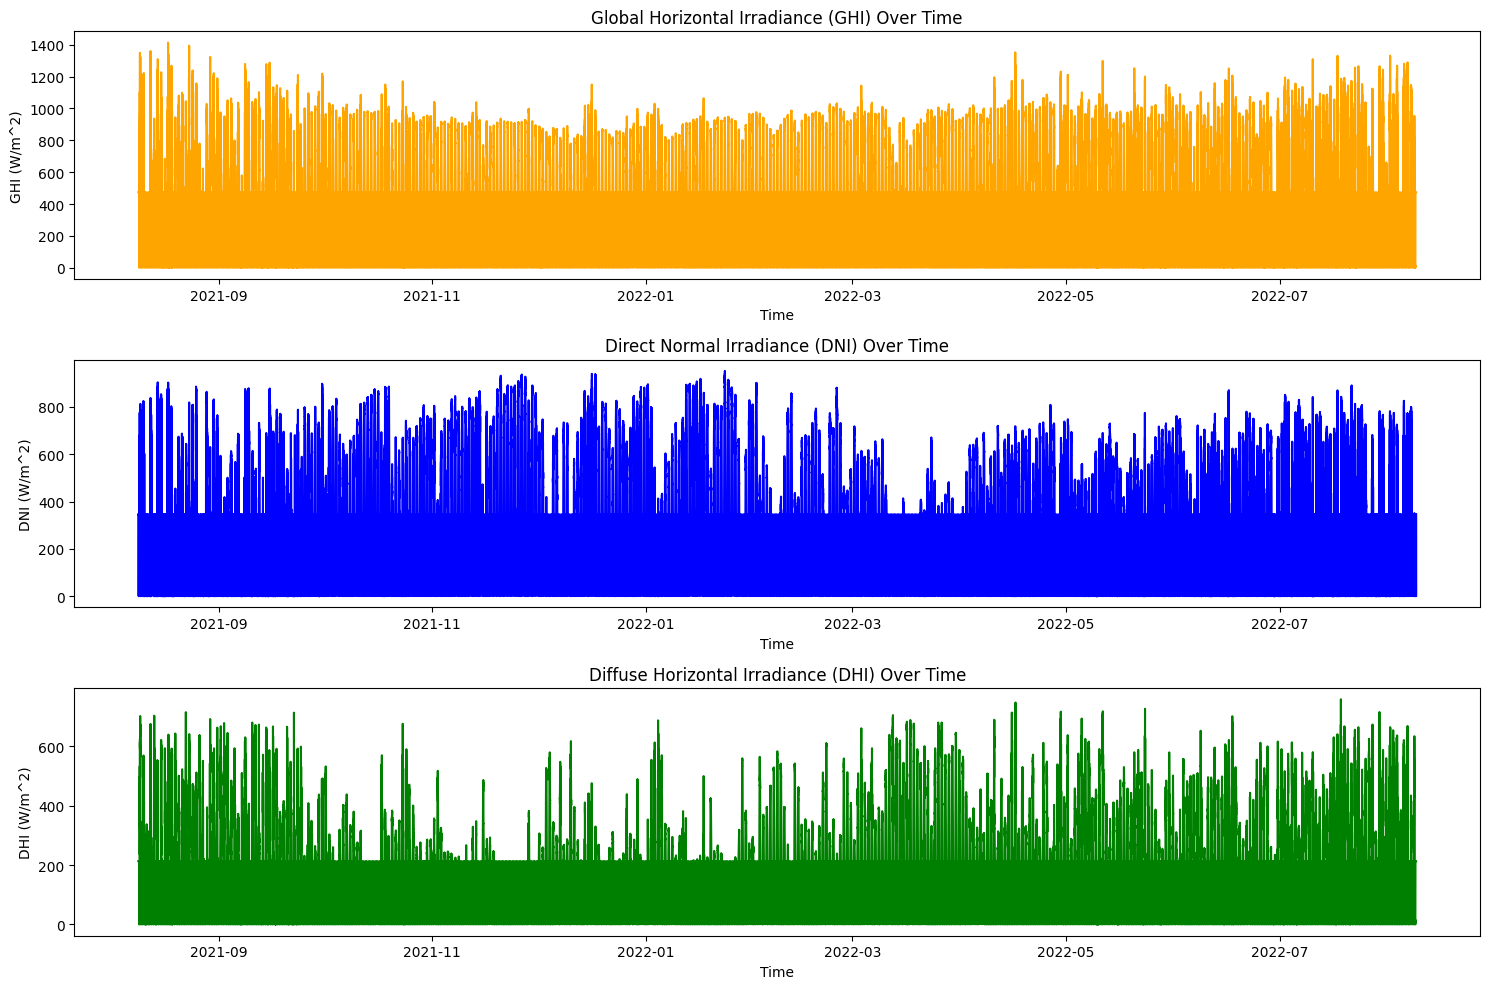

In [92]:
# Plotting GHI, DNI, and DHI over time
plt.figure(figsize=(15, 10))

# Plot Global Horizontal Irradiance (GHI)
plt.subplot(3, 1, 1)
plt.plot(df['Timestamp'], df['GHI'], color='orange')
plt.title('Global Horizontal Irradiance (GHI) Over Time')
plt.xlabel('Time')
plt.ylabel('GHI (W/m^2)')


# Plot Direct Normal Irradiance (DNI)
plt.subplot(3, 1, 2)
plt.plot(df['Timestamp'], df['DNI'], color='blue')
plt.title('Direct Normal Irradiance (DNI) Over Time')
plt.xlabel('Time')
plt.ylabel('DNI (W/m^2)')


# Plot Diffuse Horizontal Irradiance (DHI)
plt.subplot(3, 1, 3)
plt.plot(df['Timestamp'], df['DHI'], color='green')
plt.title('Diffuse Horizontal Irradiance (DHI) Over Time')
plt.xlabel('Time')
plt.ylabel('DHI (W/m^2)')

plt.tight_layout()
plt.show()

Statistical Analysis

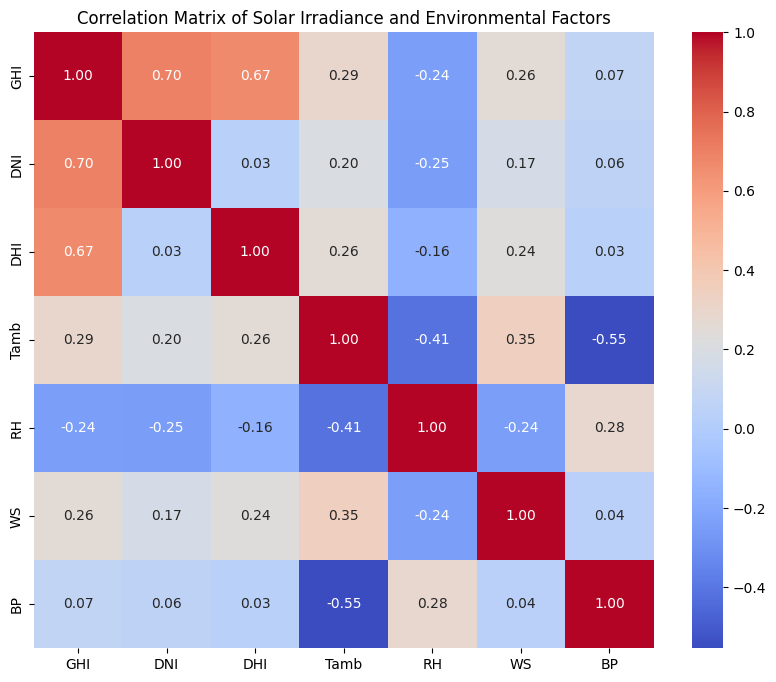

In [93]:
# Correlation analysis between GHI, DNI, DHI, and other environmental factors
correlation_matrix = df[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'BP']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Solar Irradiance and Environmental Factors')
plt.show()

In [94]:
# Calculate monthly averages to analyze seasonal trends
df['Month'] = df['Timestamp'].dt.month
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS']].mean()

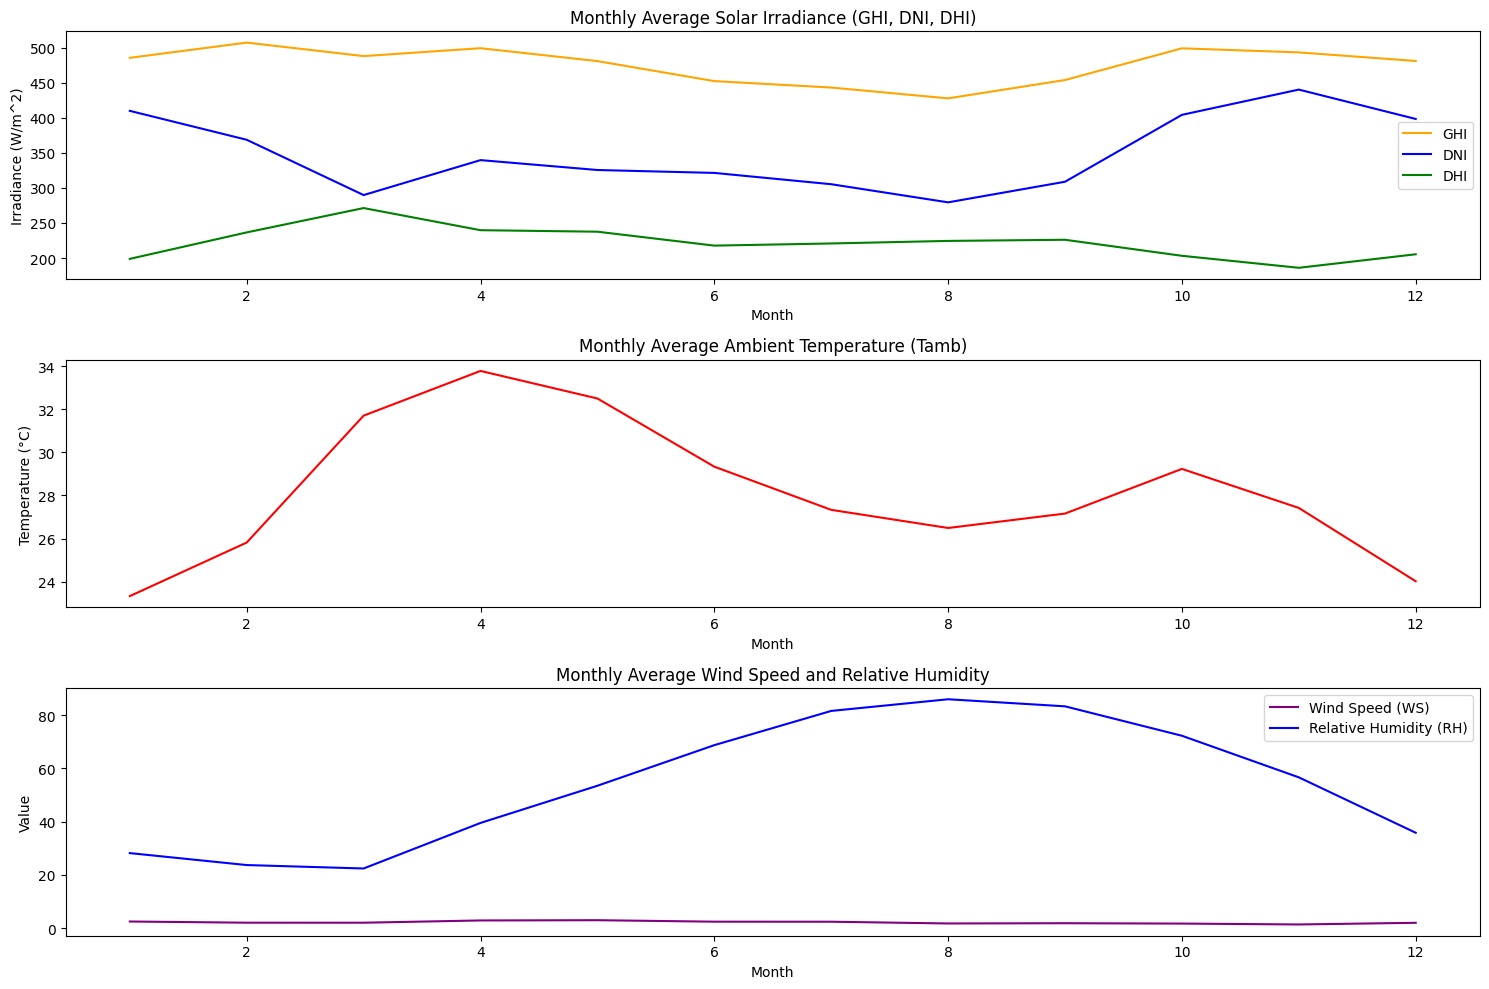

In [95]:
# Plotting seasonal trends
plt.figure(figsize=(15, 10))

# GHI, DNI, DHI monthly trends
plt.subplot(3, 1, 1)
plt.plot(monthly_avg.index, monthly_avg['GHI'], label='GHI', color='orange')
plt.plot(monthly_avg.index, monthly_avg['DNI'], label='DNI', color='blue')
plt.plot(monthly_avg.index, monthly_avg['DHI'], label='DHI', color='green')
plt.title('Monthly Average Solar Irradiance (GHI, DNI, DHI)')
plt.xlabel('Month')
plt.ylabel('Irradiance (W/m^2)')
plt.legend()

# Temperature (Tamb) monthly trend
plt.subplot(3, 1, 2)
plt.plot(monthly_avg.index, monthly_avg['Tamb'], color='red')
plt.title('Monthly Average Ambient Temperature (Tamb)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

# Wind Speed (WS) and Humidity (RH) monthly trends
plt.subplot(3, 1, 3)
plt.plot(monthly_avg.index, monthly_avg['WS'], label='Wind Speed (WS)', color='purple')
plt.plot(monthly_avg.index, monthly_avg['RH'], label='Relative Humidity (RH)', color='blue')
plt.title('Monthly Average Wind Speed and Relative Humidity')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

In [96]:
# Summary statistics for key environmental factors
summary_stats = df[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'BP']].describe()
summary_stats

,GHI,DNI,DHI,Tamb,RH,WS,BP
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,475.492396,348.965279,222.224081,28.179683,54.487969,2.121113,994.197199
std,228.385103,193.441746,107.493717,5.924297,28.073069,1.603466,2.474993
min,0.000000,0.000000,0.000000,11.000000,2.100000,0.000000,985.000000
25%,464.700000,345.700000,210.700000,24.200000,28.800000,1.000000,993.000000
50%,474.200000,345.700000,213.400000,28.000000,55.100000,1.900000,994.000000
75%,483.400000,345.700000,216.300000,32.300000,80.100000,3.100000,996.000000
max,1413.000000,952.300000,759.200000,43.800000,100.000000,19.500000,1003.000000
